In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

#Merge the original datasets with out dropping the duplicates for the calculation purpose
tot_ride_data = pd.merge(ride_data_to_load, city_data_to_load, on= 'city',how='left')

# Drop the duplicate values of city data
city_data = city_data_to_load.drop_duplicates('city')
city_data.head()

#Drop the duplicates of Ride data
ride_data = ride_data_to_load.drop_duplicates('city')
ride_data.head()

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on = 'city', how = 'left')

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

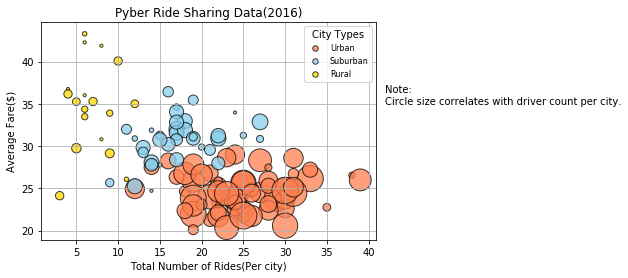

In [4]:
# Obtain the x and y coordinates for each of the three city types
pyber_urban = pyber_data[pyber_data["type"] == "Urban"].groupby([pyber_data["city"]])
pyber_suburban = pyber_data[pyber_data["type"] == "Suburban"].groupby([pyber_data["city"]])
pyber_rural = pyber_data[pyber_data["type"] == "Rural"].groupby([pyber_data["city"]])
#
pyber_ride_udata = tot_ride_data[tot_ride_data["type"] == "Urban"].groupby([tot_ride_data["city"]])
pyber_ride_sudata = tot_ride_data[tot_ride_data["type"] == "Suburban"].groupby([tot_ride_data["city"]])
pyber_ride_rdata = tot_ride_data[tot_ride_data["type"] == "Rural"].groupby([tot_ride_data["city"]])

#Calculate average fares for three types
avg_fare_urb = pyber_ride_udata["fare"].mean()
tot_ride_urb = pyber_ride_udata["ride_id"].count()
tot_drivr_urb = pyber_urban["driver_count"].mean()

#calculate the total number of rides in the three types
avg_fare_suburb = pyber_ride_sudata["fare"].mean()
tot_ride_suburb = pyber_ride_sudata["ride_id"].count()
tot_drivr_suburb = pyber_suburban["driver_count"].mean()

#calculate the number of drivers in the city

avg_fare_rural = pyber_ride_rdata["fare"].mean()
tot_ride_rural = pyber_ride_rdata["ride_id"].count()
tot_drivr_rural = pyber_rural["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(tot_ride_urb, avg_fare_urb, s=tot_drivr_urb*10, marker = "o",facecolors = "coral", 
              edgecolors = "black", alpha = 0.75, label = "Urban")
plt.scatter(tot_ride_suburb, avg_fare_suburb, s=tot_drivr_suburb*10, marker = "o",facecolors = "skyblue", 
             edgecolors = "black", alpha = 0.75, label = "Suburban")
plt.scatter(tot_ride_rural, avg_fare_rural, s=tot_drivr_rural*10, marker = "o",facecolors = "gold", 
              edgecolors = "black", alpha = 0.75, label = "Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per city)")
plt.ylabel("Average Fare($)")
plt.grid()

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend REF LINK https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
#https://stackoverflow.com/questions/8482588/putting-text-in-top-left-corner-of-matplotlib-plot
#https://matplotlib.org/tutorials/text/text_intro.html
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("Images/PyberRideSharingData.png")
#plt.tight_layout()
plt.show()


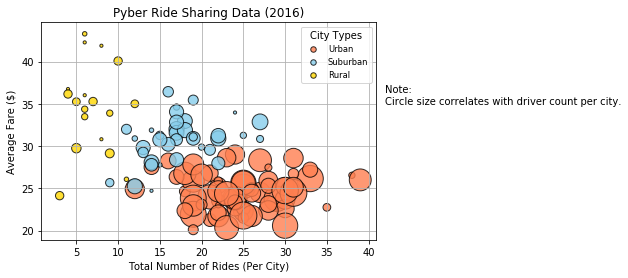

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

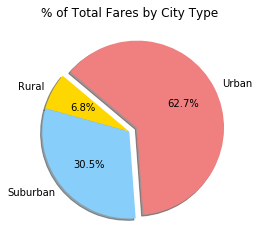

In [13]:
# Calculate Type Percents
tot_fares = tot_ride_data.groupby(['type'])
pie_fares = tot_fares['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(pie_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")
plt.show()


## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

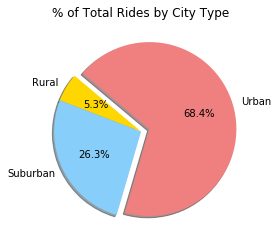

In [131]:
# Calculate Ride Percents
pie_rides = tot_fares['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(pie_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")
plt.show()


In [142]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by City Type')

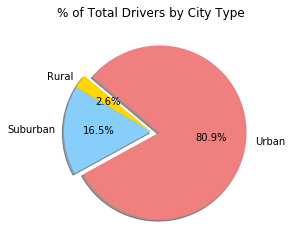

In [134]:
# Calculate Driver Percents
tot_drivers = pyber_data.groupby(['type'])
pie_drivers = tot_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(pie_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/TotalDriversbyCityType.png")
